In [70]:
# !git clone https://github.com/Sibgat-Ul/Road_Accidents_Pakistan_Prediction/ && mv ./Road_Accidents_Pakistan_Prediction/* ./

In [71]:
# !mv ./Road_Accidents_Pakistan_Prediction/* ./

In [46]:
import pandas as pd
import numpy as np
from openpyxl.styles.builtins import total

import seaborn as sns
import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings('ignore')

### Few helper functions:

In [47]:
def get_cat_cols(df: pd.DataFrame) -> list:
    """"
    :param df: Dataframe 
    :return: list of column names
    
    to get categorical columns
    """
    return [col for col in df.columns if df[col].dtype == 'object']

def get_num_cols(df):
    """"
    :param df: Dataframe 
    :return: list of column names
    
    to get num columns
    """
    return [col for col in df.columns if df[col].dtype != 'object']

def get_info(dataset: pd.DataFrame):
    """
    
    :param dataset: pd.DataFrame
    :return: pd.DataFrame
    
    Makes a new df with missing and unique values.
    """
    new_df = pd.DataFrame()
    new_df['missing_count'] = dataset.isnull().sum()
    new_df['total'] = dataset.shape[0]
    new_df['missing%'] = (dataset.isnull().sum() / dataset.shape[0])*100
    new_df['n_unique'] = dataset.nunique()
    new_df['type'] = dataset.dtypes
    print(f"Size: {rta_dataset.shape}")
    return new_df

In [48]:
# Importing the dataset

rta_dataset = pd.read_excel('./data/RTA Data 2020 to July 2023.xlsx')
cat_cols = get_cat_cols(rta_dataset)
num_cols = get_num_cols(rta_dataset)

In [49]:
info_df = get_info(rta_dataset)
info_df

Size: (46189, 25)


,missing_count,total,missing%,n_unique,type
EcYear,0,46189,0.000000,5,object
EcNumber,7211,46189,15.611942,34800,object
CallTime,5956,46189,12.894845,40170,datetime64[ns]
EmergencyArea,1,46189,0.002165,37520,object
TotalPatientsInEmergency,0,46189,0.000000,13,object
Gender,1,46189,0.002165,4,object
Age,1,46189,0.002165,100,float64
HospitalName,21950,46189,47.522137,162,object
Reason,1,46189,0.002165,23940,object
responsetime,5,46189,0.010825,68,float64


In [50]:
rta_dataset

,EcYear,EcNumber,CallTime,EmergencyArea,TotalPatientsInEmergency,Gender,Age,HospitalName,Reason,responsetime,...,BikesInvolved,BusesInvolved,CarsInvolved,CartInvovled,RickshawsInvolved,TractorInvovled,TrainsInvovled,TrucksInvolved,VansInvolved,OthersInvolved
0,2020,31486,2020-12-31 22:41:47,NEAR APS SCHOOL FORT ROAD RWP,1,Male,27.0,BBH,Bike Slip,10.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020,31485,2020-12-31 22:25:00,"Infront of Daig.com, Near Dha gate 2, gt road...",1,Male,20.0,NaN,Car hit Footpath,12.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020,31483,2020-12-31 21:54:59,Muhammadi chowk arshad bakery khyaban e sirsye...,1,Male,48.0,BBH,Rickshaw hit with Car,10.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,2020,31482,2020-12-31 21:24:22,"Gulzar e quaid, T/W Katcheri Near Attock Pump,...",1,Male,45.0,NaN,Car hit Car and runaway,5.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020,31479,2020-12-31 21:03:49,Taaj Company Gawalmandi Chowk Liaqat Baag Road...,1,Male,22.0,NaN,Unknown Bike hit Bike and runaway,5.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46184,2023,NaN,NaT,Infront Of Mian G hotel GT Road Mandra,2,Male,20.0,"RHC,Mandra,Rawalpindi",.,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
46185,2023,356986,2023-01-01 04:23:00,"Barma Shell Depu Dhoke Munshi Road, Fazal Town...",1,Male,16.0,DHQ,Bike slipped due to over speed.(RIN.6276) C D...,11.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
46186,2023,356981,2023-01-01 02:16:00,Main Bakra Mandi Chowk Rwp,1,Female,10.0,NaN,RLF-2193 coure and ICT-593 corolla car colliped,1.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
46187,2023,356980,2023-01-01 02:02:00,"Darbar Adda, Mandi Morr, Bus Stop, Ijp Road, Rwp",1,Male,19.0,NaN,Bike slipped due to Over speed ( Bike no TSH ...,12.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Checking the unique values 

In [51]:
filtered_cols = rta_dataset[info_df[info_df['n_unique'] < 15].index]
unique_values = [{f'{col}: {rta_dataset[col].unique()}'} for col in filtered_cols.columns]
unique_values

[{"EcYear: [2020 2021 2022 'Hospital' 2023]"},
 {"TotalPatientsInEmergency: [1 2 3 4 8 6 5 10 7 11 9 'Alive & unstable' 15]"},
 {"Gender: ['Male' 'Female' 'Other' nan 0]"},
 {"EducationTitle: ['Intermediate' 'Illetrate' 'Matric' 'Primary' 'Graduation' 'Masters'\n 'Middle' 'PHD' nan 0]"},
 {"InjuryType: ['Minor' 'Single Fracture' 'Head Injury' 'Multiple Fractures'\n 'Spinal Injury' nan]"},
 {"Cause: ['Over Speed' 'Carelessness' 'Tyre Burst' 'U Turn' 'Others' 'Wrong Turn'\n 'One Wheeling' nan]"},
 {"PatientStatus: ['Alive & unstable' 'Alive & stable' 'Dead' nan]"},
 {'BicycleInvovled: [ 0.  1.  2. nan]'},
 {'BikesInvolved: [ 1.  0.  2.  3. 10. nan]'},
 {'BusesInvolved: [ 0.  1.  2. nan]'},
 {'CarsInvolved: [ 0.  1.  2.  3.  4. nan  5.]'},
 {'CartInvovled: [ 0.  1. nan]'},
 {'RickshawsInvolved: [ 0.  1.  2. nan]'},
 {'TractorInvovled: [ 0.  1. nan]'},
 {'TrainsInvovled: [ 0.  1. nan]'},
 {'TrucksInvolved: [ 0.  1.  2.  3. nan]'},
 {'VansInvolved: [ 0.  1.  2.  4.  3. nan]'},
 {'OthersInvo

### Processing
- We will drop the columns with the most missing values 
- drop the rows having problematic values (EcYear with Hospital, 0 for Gender)

We have considered dropping rather than filling the values because there are enough samples available.

In [52]:
def drop_garbage_rows(df, col, to_drop):
    df.drop(index=df[df[col] == to_drop].index, axis=0, inplace=True)


drop_garbage_rows(rta_dataset, "EcYear", "Hospital")
drop_garbage_rows(rta_dataset, "Gender", 0)
drop_garbage_rows(rta_dataset, "TotalPatientsInEmergency", 'Alive & unstable')
drop_garbage_rows(rta_dataset, "EducationTitle", 0)

In [53]:
rta_dataset.drop(columns=['HospitalName', 'EcNumber', 'CallTime'], inplace=True)

In [54]:
# Another problematic row
rta_dataset[rta_dataset["Gender"].isnull()]

,EcYear,EmergencyArea,TotalPatientsInEmergency,Gender,Age,Reason,responsetime,EducationTitle,InjuryType,Cause,...,BikesInvolved,BusesInvolved,CarsInvolved,CartInvovled,RickshawsInvolved,TractorInvovled,TrainsInvovled,TrucksInvolved,VansInvolved,OthersInvolved
31355,2022,"Near 502 Park, Adyala Road Rawalpindi.",2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Few more problematic rows

In [55]:
rta_dataset.drop(index=rta_dataset[rta_dataset["Gender"].isnull()].index, inplace=True)
rta_dataset.drop(index=rta_dataset[rta_dataset["EmergencyArea"].isnull()].index, inplace=True)
rta_dataset.drop(index=rta_dataset[rta_dataset["responsetime"].isnull()].index, inplace=True)

### 0 missing!

and we even have enough samples to train the model.

In [56]:
get_info(rta_dataset)

Size: (46182, 22)


,missing_count,total,missing%,n_unique,type
EcYear,0,46182,0.0,4,object
EmergencyArea,0,46182,0.0,37515,object
TotalPatientsInEmergency,0,46182,0.0,12,object
Gender,0,46182,0.0,3,object
Age,0,46182,0.0,100,float64
Reason,0,46182,0.0,23934,object
responsetime,0,46182,0.0,68,float64
EducationTitle,0,46182,0.0,8,object
InjuryType,0,46182,0.0,5,object
Cause,0,46182,0.0,7,object


In [61]:
cat_cols = get_cat_cols(rta_dataset)
num_cols = get_num_cols(rta_dataset)

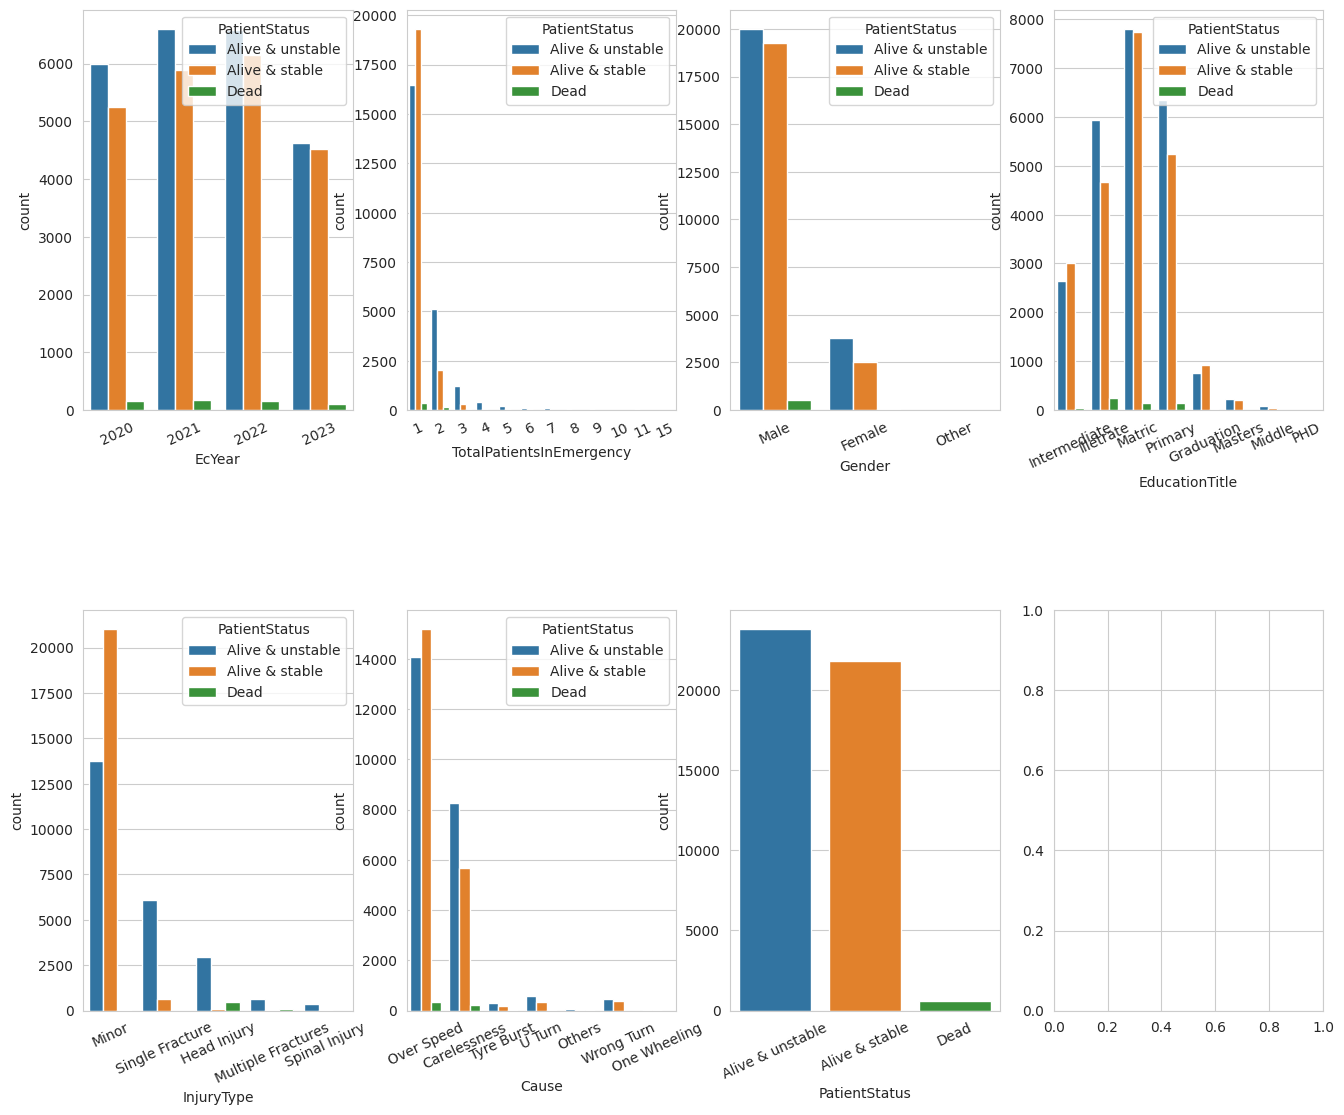

In [57]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 13))
plt.subplots_adjust(hspace=.5)

r, c = 0, 0

for col in filtered_cols:
    if col in cat_cols:
        plot = sns.countplot(data=rta_dataset, x=rta_dataset[col], hue='PatientStatus', ax=axes[r, c])
        plot.set_xticklabels(plot.get_xticklabels(), rotation=25)

    if c < 3:
        c = c + 1
    else:
        c = 0
        if r < 1:
            r = r + 1

plt.show()

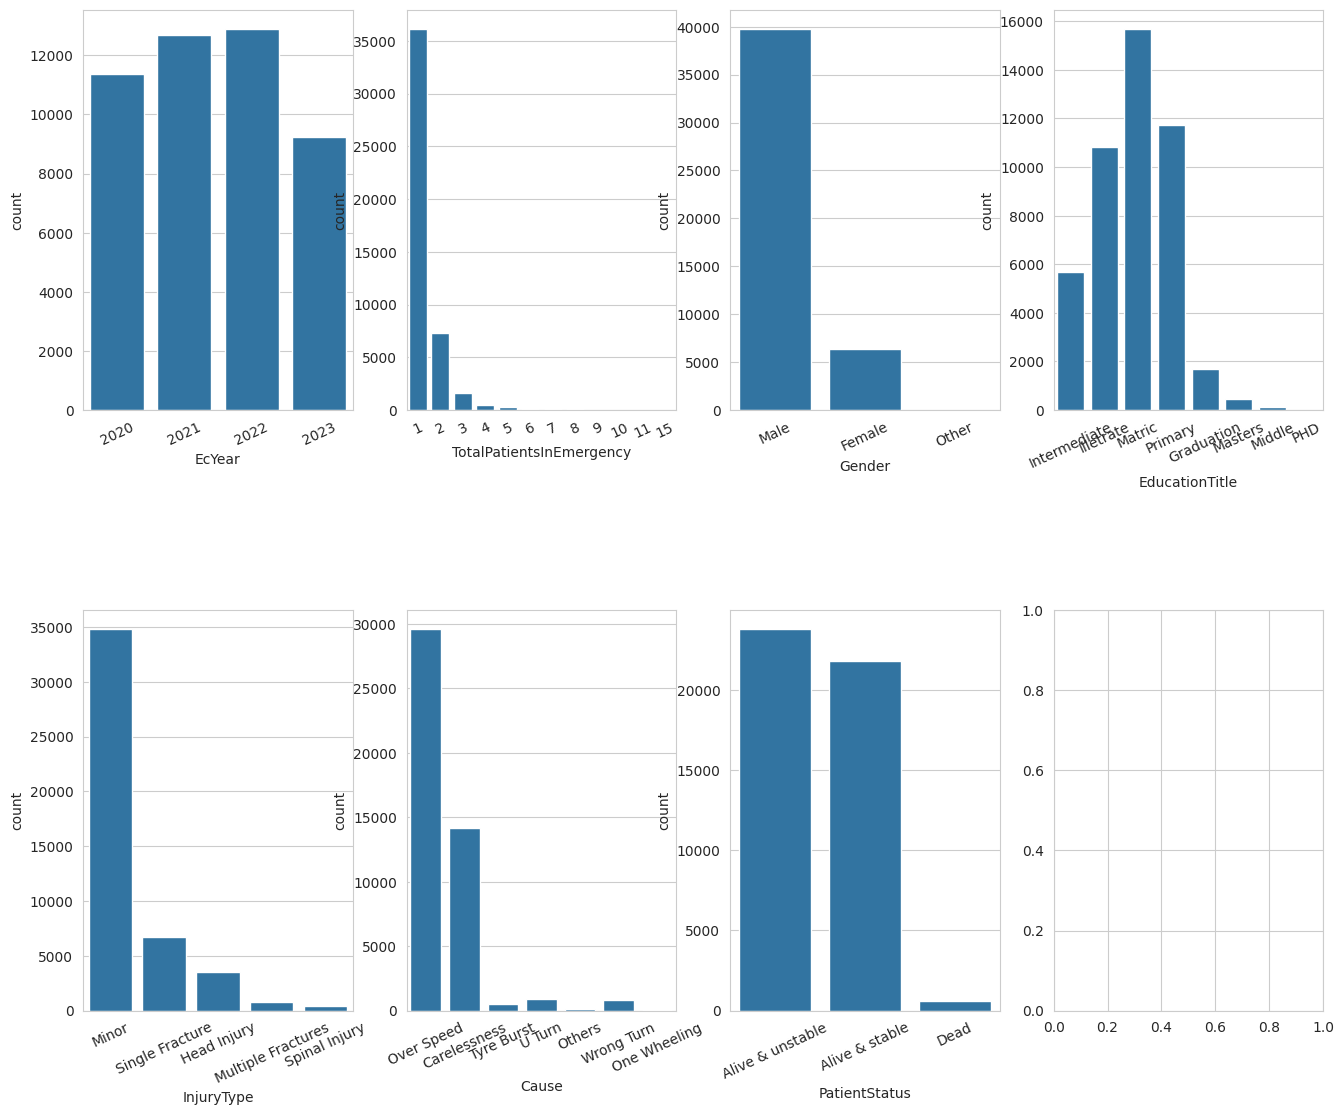

In [58]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 13))
plt.subplots_adjust(hspace=.5)

r, c = 0, 0

for col in filtered_cols.columns:
    if col in cat_cols:
        plot = sns.countplot(data=rta_dataset, x=rta_dataset[col], ax=axes[r, c])
        plot.set_xticklabels(plot.get_xticklabels(), rotation=25)
    if c < 3:
        c = c + 1
    else:
        c = 0
        if r < 1:
            r = r + 1

plt.show()

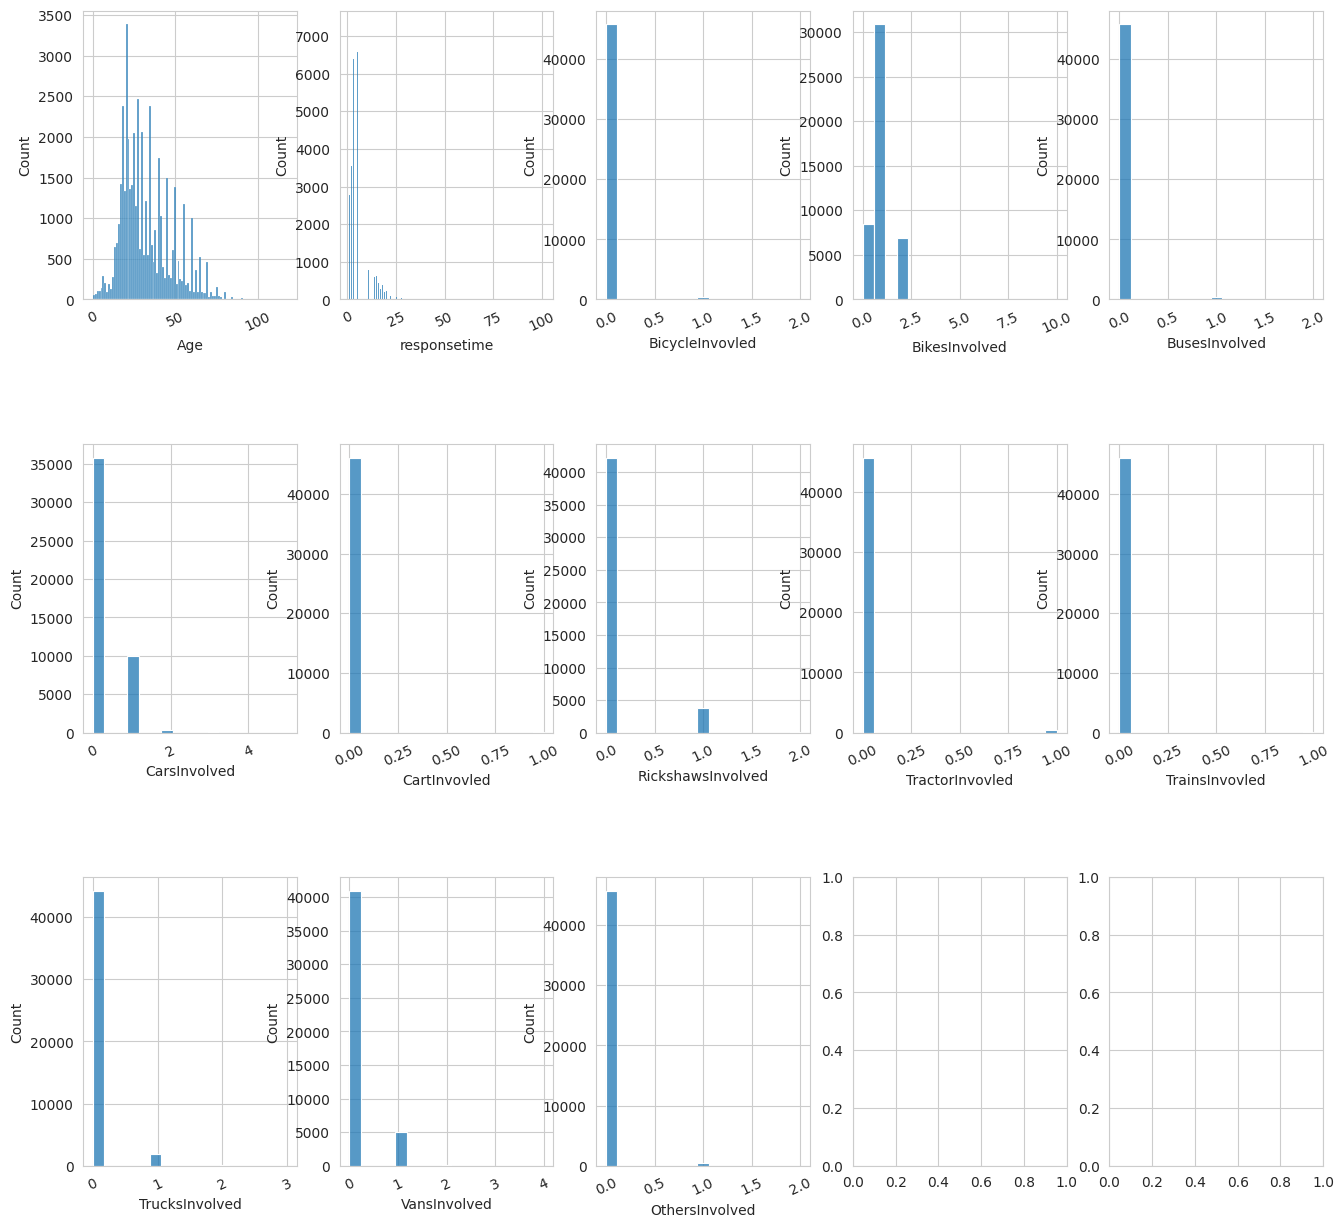

In [62]:
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(16, 15))
plt.subplots_adjust(hspace=.5)

r, c = 0, 0

for col in num_cols:
    plot = sns.histplot(data=rta_dataset, x=col, ax=axes[r, c])
    plot.set_xticklabels(plot.get_xticklabels(), rotation=25)
    if c < 4:
        c = c + 1
    else:
        c = 0
        if r < 2:
            r = r + 1


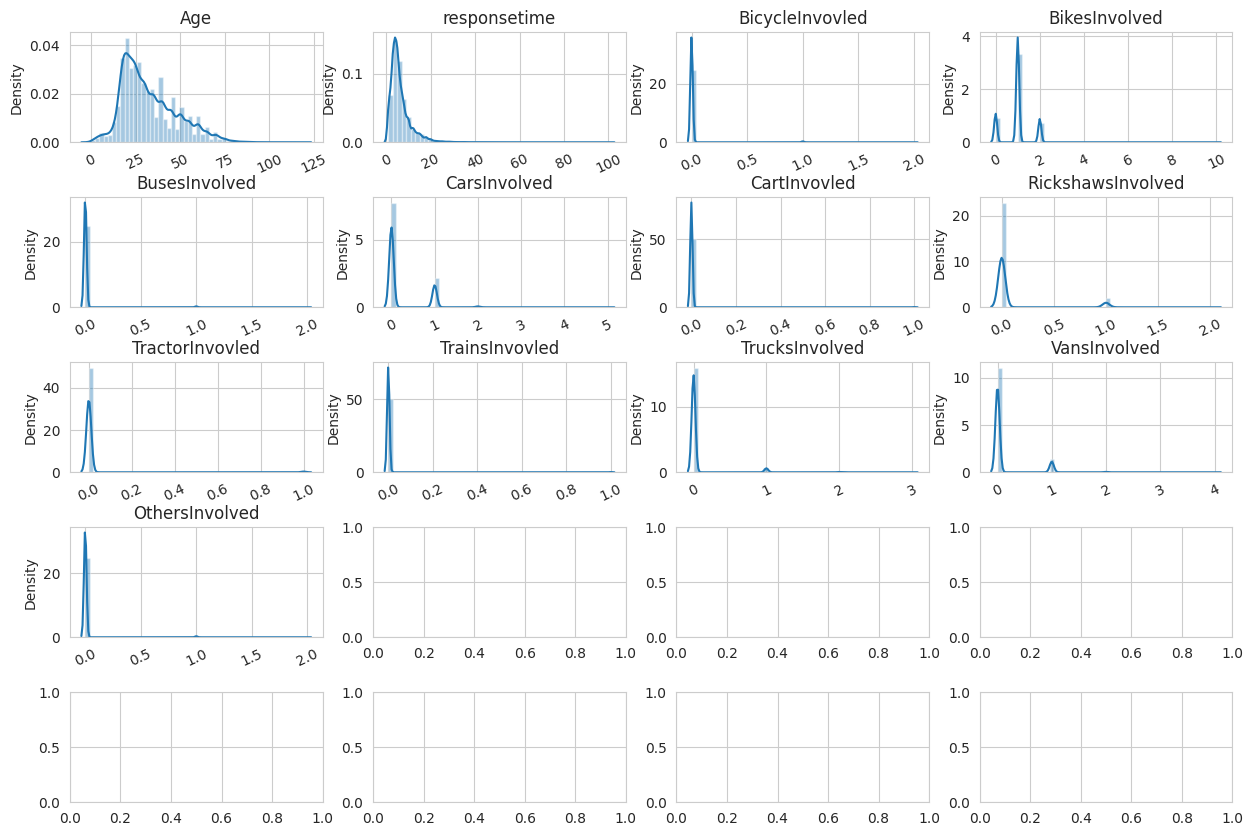

In [63]:
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(15, 10))
plt.subplots_adjust(hspace=.5)

r, c = 0, 0

for col in num_cols:
    plot = sns.distplot(x=rta_dataset[col], ax=axes[r, c])
    plot.set_xticklabels(plot.get_xticklabels(), rotation=25)
    plot.set_title(col)
    if c < 3:
        c = c + 1
    else:
        c = 0
        if r < 4:
            r = r + 1


<Axes: xlabel='PatientStatus', ylabel='count'>

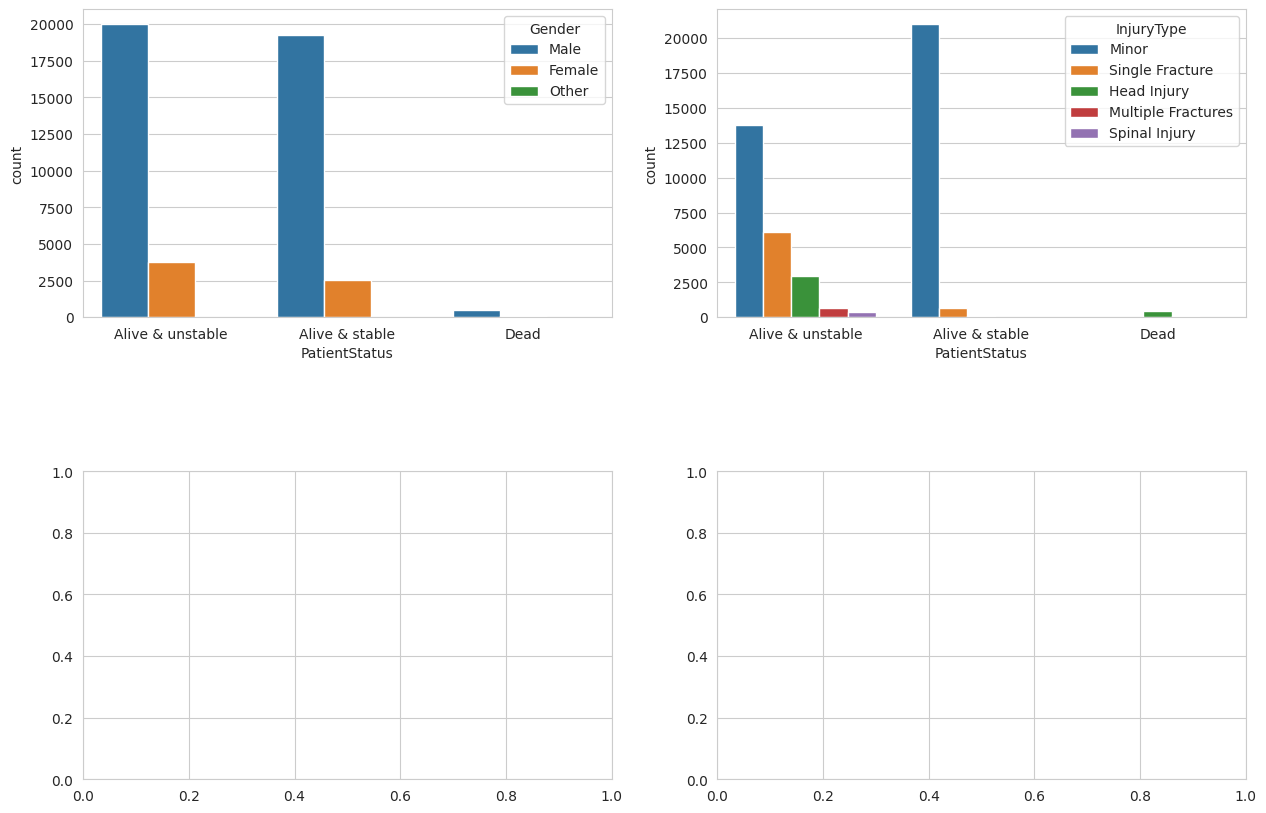

In [64]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
plt.subplots_adjust(hspace=.5)

sns.countplot(data=rta_dataset, x='PatientStatus', hue='Gender', ax=axes[0,0])

sns.countplot(data=rta_dataset, x='PatientStatus', hue='InjuryType', ax=axes[0,1])

# plot3 = sns.countplot(data=rta_dataset, x='CallTime', hue='PatientStatus', ax=axes[1,0])
# plot3.set_xticklabels(plot3.get_xticklabels(), rotation=80)

# sns.countplot(data=rta_dataset, x='PatientStatus', hue='Gender', ax=axes[1,1])

<Axes: >

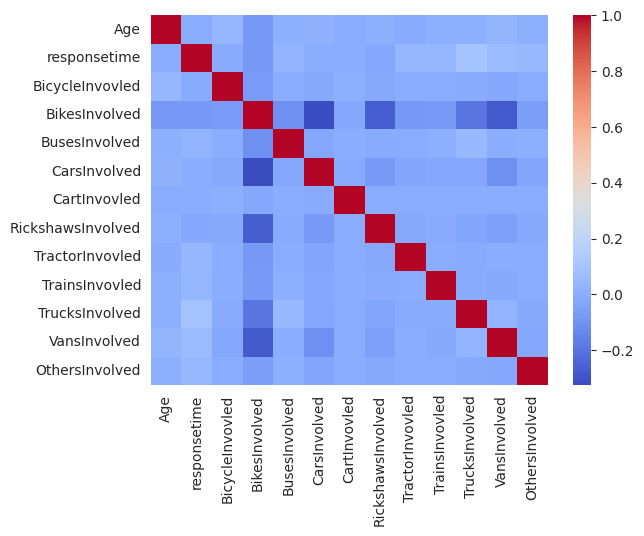

In [65]:
sns.heatmap(rta_dataset[num_cols].corr(), cmap='coolwarm')

In [66]:
rta_dataset['Reason']

0                                                Bike Slip
1                                         Car hit Footpath
2                                    Rickshaw hit with Car
3                                  Car hit Car and runaway
4                        Unknown Bike hit Bike and runaway
                               ...                        
46184                                                    .
46185     Bike slipped due to over speed.(RIN.6276) C D...
46186      RLF-2193 coure and ICT-593 corolla car colliped
46187     Bike slipped due to Over speed ( Bike no TSH ...
46188                   Both car hited eachother overspeed
Name: Reason, Length: 46182, dtype: object

#### prepare for encoding

In [67]:
# label encoder
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

filtered_cols = rta_dataset[info_df[info_df['n_unique'] < 10].index]
to_encode = [{f'{col}: {rta_dataset[col].unique()}'} for col in filtered_cols.columns if col in cat_cols]
to_encode

[{'EcYear: [2020 2021 2022 2023]'},
 {"Gender: ['Male' 'Female' 'Other']"},
 {"EducationTitle: ['Intermediate' 'Illetrate' 'Matric' 'Primary' 'Graduation' 'Masters'\n 'Middle' 'PHD']"},
 {"InjuryType: ['Minor' 'Single Fracture' 'Head Injury' 'Multiple Fractures'\n 'Spinal Injury']"},
 {"Cause: ['Over Speed' 'Carelessness' 'Tyre Burst' 'U Turn' 'Others' 'Wrong Turn'\n 'One Wheeling']"},
 {"PatientStatus: ['Alive & unstable' 'Alive & stable' 'Dead']"}]

In [68]:
le = LabelEncoder()

rta_dataset["InjuryType"] = le.fit_transform(rta_dataset["InjuryType"])
rta_dataset["Cause"] = le.fit_transform(rta_dataset["Cause"])
rta_dataset["EducationTitle"] = le.fit_transform(rta_dataset["EducationTitle"])
rta_dataset["PatientStatus"] = le.fit_transform(rta_dataset["PatientStatus"])
rta_dataset = pd.get_dummies(rta_dataset, columns=["Gender"], drop_first=True)

In [69]:
rta_dataset

,EcYear,EmergencyArea,TotalPatientsInEmergency,Age,Reason,responsetime,EducationTitle,InjuryType,Cause,PatientStatus,...,CarsInvolved,CartInvovled,RickshawsInvolved,TractorInvovled,TrainsInvovled,TrucksInvolved,VansInvolved,OthersInvolved,Gender_Male,Gender_Other
0,2020,NEAR APS SCHOOL FORT ROAD RWP,1,27.0,Bike Slip,10.0,2,1,3,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True,False
1,2020,"Infront of Daig.com, Near Dha gate 2, gt road...",1,20.0,Car hit Footpath,12.0,1,1,3,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True,False
2,2020,Muhammadi chowk arshad bakery khyaban e sirsye...,1,48.0,Rickshaw hit with Car,10.0,1,3,3,1,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,True,False
3,2020,"Gulzar e quaid, T/W Katcheri Near Attock Pump,...",1,45.0,Car hit Car and runaway,5.0,4,1,3,0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True,False
4,2020,Taaj Company Gawalmandi Chowk Liaqat Baag Road...,1,22.0,Unknown Bike hit Bike and runaway,5.0,4,3,3,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46184,2023,Infront Of Mian G hotel GT Road Mandra,2,20.0,.,3.0,1,3,0,1,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,True,False
46185,2023,"Barma Shell Depu Dhoke Munshi Road, Fazal Town...",1,16.0,Bike slipped due to over speed.(RIN.6276) C D...,11.0,1,1,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True,False
46186,2023,Main Bakra Mandi Chowk Rwp,1,10.0,RLF-2193 coure and ICT-593 corolla car colliped,1.0,7,1,0,0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False
46187,2023,"Darbar Adda, Mandi Morr, Bus Stop, Ijp Road, Rwp",1,19.0,Bike slipped due to Over speed ( Bike no TSH ...,12.0,7,1,3,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True,False
